In [8]:
import numpy as np
import imageio
from scipy.fftpack import fft, ifft
from scipy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib import cm
import imageio

plt.rcParams['figure.figsize'] = (16,8)

# Problem 1

In [4]:
a, b = -1, 1.
alpha, beta = 1., 7.

#### Define variables x_steps, final_T, time_steps ####
x_steps = 20
time_steps = 250
final_T = .2
delta_t, delta_x = final_T/time_steps, (b-a)/x_steps
x0 = np.linspace(a,b,x_steps+1)

In [5]:
# Check a stability condition for this numerical method
if delta_t/delta_x**2. > .5:
    print("stability condition fails")
    
u = np.empty((2,x_steps+1))
u[0] = (beta - alpha)/(b-a)*(x0-a) + alpha
u[1] = (beta - alpha)/(b-a)*(x0-a) + alpha

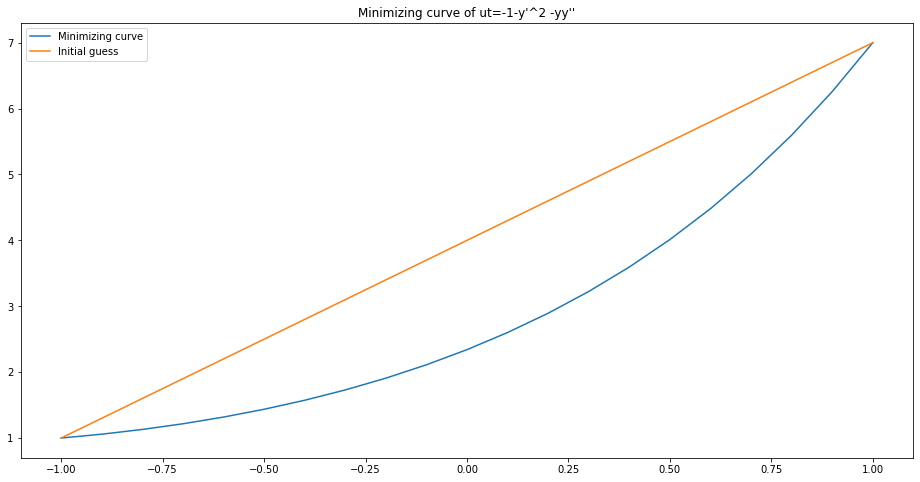

Difference in iterations is  0.0
Final time =  0.2


In [16]:
def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])

    # Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    rhs(u[1])
    if norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1
#plot the results
plt.plot(x0,u[0],label="Minimizing curve")
plt.plot(x0,(beta - alpha)/(b-a)*(x0-a) + alpha,label="Initial guess")
plt.gca().legend()
plt.title("Minimizing curve of ut=-1-y'^2 -yy''")
plt.show()
print("Difference in iterations is ", norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)

# Problem 2

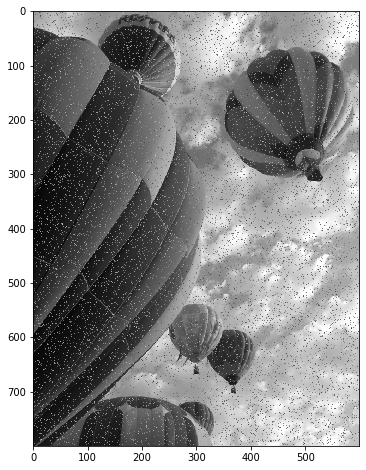

In [79]:
imagename = 'balloons_bw.jpg'
changed_pixels=40000

# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.

IM = imageio.imread(imagename, as_gray=True) * (1. / 255)
IM_x, IM_y = IM.shape
#noise up the image
for lost in range(changed_pixels):
    x_,y_ = np.random.randint(1,IM_x-2), np.random.randint(1,IM_y-2)
    val = .1*np.random.randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)

    
plt.imshow(IM,cmap='gray')


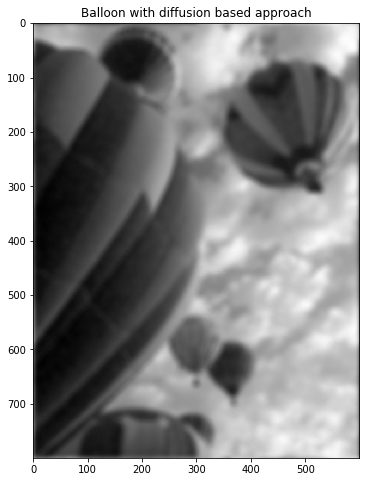

In [84]:
dt = 1e-3
lamb = 40
dx = 1
dy = 1
time_steps = 250
u = np.zeros((2,IM_x,IM_y))
u[0] = IM.copy()
u[1] = IM.copy()

f = IM.copy()
def rhs(u):
    #calculate the derivatives
    uxx =np.roll(u,-1,axis=1)-2*u+np.roll(u,1,axis=1)
    uyy = np.roll(u,-1,axis=0)-2*u+np.roll(u,1,axis=0)
    #take the step
    u -= (f - lamb*(uxx+uyy))*dt
iteration = 0
#do it for given time steps or within a tolerance
while iteration < time_steps:
    rhs(u[1])
    if norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1
plt.title("Balloon with diffusion based approach")
plt.imshow(u[0],cmap='gray')

# Problem 3

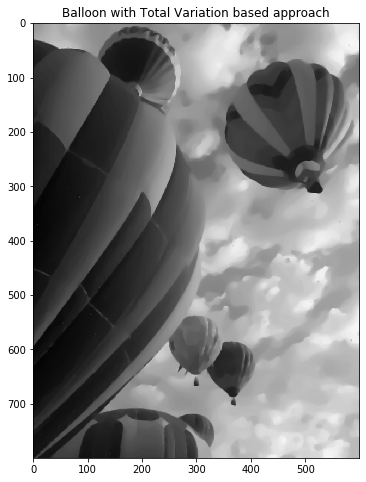

In [83]:
dt = 1e-3
lamb = 1
dx = 1
dy = 1
time_steps = 200
u = np.array([IM.copy(),IM.copy()])
eps = 1e-6
f = IM.copy()
def rhs(a):
    #calculate the derivatives
    ux = (np.roll(a,-1,axis=1) - np.roll(a,1,axis=1))/2
    uy = (np.roll(a,-1,axis=0) - np.roll(a,1,axis=0))/2
    uxx =np.roll(a,-1,axis=1)-2*a+np.roll(a,1,axis=1)
    uyy = np.roll(a,-1,axis=0)-2*a+np.roll(a,1,axis=0)
    uxy = (np.roll(ux,-1,axis=0) - np.roll(ux,1,axis=0))/2
    #take the step
    a += dt*(-lamb*(a-f)+(uxx*uy**2+uyy*ux**2-2*ux*uy*uxy)/((eps+ux**2+uy**2)**1.5))
iteration = 0
#take the steps while checking if its within a certain tolerance
while iteration < time_steps:
    rhs(u[1])
    if norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1
plt.title("Balloon with Total Variation based approach")
plt.imshow(u[0],cmap='gray')

In [ ]:
#real cool also epsilon was like 1e-6 and worked out real nice